# REIT ETFs Price Prediction

In [1]:
# util.py has pmdarima function inside
# Need to install it before import the pyfile
!pip install pmdarima

     |████████████████████████████████| 1.5MB 6.9MB/s 
     |████████████████████████████████| 9.5MB 18.3MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


## I. Google Colab Setup

In [2]:
# Google Colab
from google.colab import drive
import os

# General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# from pickle import dump, load

# Scikit-Learn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.model_selection import GridSearchCV

# Keras, Tensorflow
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

In [3]:
# Mount Google Drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [4]:
# Get the current working directory
print(os.getcwd())

/content


In [5]:
# Drive path is the path where I upload the ETFs history file and pre-written pyfile
drive_path_csv = '/gdrive/MyDrive/Capstone_Project/REIT_ETFs.csv'
drive_path_util = '/gdrive/MyDrive/Capstone_Project/util.py'
# drive_path_lstm = '/gdrive/MyDrive/Capstone_Project/lstm.h5'

# Expect to move these file into the local path
local_path = '/content'

In [6]:
# Copy these file in drive path
!cp '{drive_path_csv}' .
!cp '{drive_path_util}' .

# Change these file from drive path to the local path
os.chdir(local_path)

In [7]:
# Pre-written function
import util as ut

## II. Preprocessing

In [8]:
data = pd.read_csv('/content/REIT_ETFs.csv')
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
0,2004-09-29,23.794544,23.861371,23.789772,23.794544,205800,0.0,0.0,VNQ
1,2004-09-30,23.866143,24.023660,23.861370,23.985474,27900,0.0,0.0,VNQ
2,2004-10-01,24.033207,24.462799,23.985476,24.429386,129800,0.0,0.0,VNQ
3,2004-10-04,24.529629,24.606000,24.529629,24.534403,8100,0.0,0.0,VNQ
4,2004-10-05,24.534403,24.582135,24.510535,24.529629,11900,0.0,0.0,VNQ
...,...,...,...,...,...,...,...,...,...
53434,2021-06-17,9.280000,9.290000,9.220000,9.220000,5200,0.0,0.0,REK
53435,2021-06-18,9.330000,9.370000,9.270000,9.370000,22800,0.0,0.0,REK
53436,2021-06-21,9.320000,9.320000,9.170000,9.170000,22900,0.0,0.0,REK
53437,2021-06-22,9.160000,9.230000,9.160000,9.220000,6200,0.0,0.0,REK


In [9]:
ticker = [x for x in data['Ticker'].unique()]
ticker

['VNQ',
 'IYR',
 'SCHH',
 'ICF',
 'USRT',
 'RWR',
 'REM',
 'REZ',
 'KBWY',
 'MORT',
 'PSR',
 'FRI',
 'ROOF',
 'RDOG',
 'REK']

In [10]:
def xy_split (dataset, timestep):
    '''
    Split the time series into X and y part based on the number of timestep.
    Ex. Use n days to predict the next preceding day (n+1) price.
    
    -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

    Inputs:
    - dataset: Time series data
    - timestep: number of days in integer
    
    Return: 
    - X_part, y_part (in arrays)
    '''
    
    X_part, y_part = [], []
    
    for i in range(len(dataset)-timestep-1):
         
        X_part.append(dataset[i:(i+timestep)])

        y_part.append(dataset[i+timestep])

    return np.array(X_part), np.array(y_part)

## III. Modeling and Evaluation

In [11]:
def etf():
    print("Select one REIT ETF from the following list: \n")
    for i in range(0,15):
        print(ticker[i])

    print("\n")
    ticker_name = input("Which REIT ETF do you want to predict? \n").upper()
    
    etf = data.copy().loc[data['Ticker'] == ticker_name]
    ut.preprocess_df(etf)

    ut.visualize_time_series(etf['Close'], ticker_name)

    train = etf['Close'].iloc[:-275]
    test = etf['Close'].iloc[-22:]
        
    scaler = MinMaxScaler()

    train_scale = scaler.fit_transform(train.values.reshape(-1,1))
    test_scale = scaler.transform(test.values.reshape(-1,1))

    X_test, y_test = xy_split(test_scale, timestep=1)

    # Load model (if run in another notebook)
    best = load_model('/content/f250.h5')

    # Make prediction on the holdout test set
    y_test_pred = best.predict(X_test)

    # Inverse transform the test prediction and actual
    y_test_inv = scaler.inverse_transform(y_test_pred)
    y_test_true = scaler.inverse_transform(y_test)

    ut.evaluate(y_test_true, y_test_inv)
    ut.lstm_plot_prediction(y_test_true, y_test_inv)

Select one REIT ETF from the following list: 

VNQ
IYR
SCHH
ICF
USRT
RWR
REM
REZ
KBWY
MORT
PSR
FRI
ROOF
RDOG
REK


Which REIT ETF do you want to predict? 
vnq
This dataframe's index is in datatime64? True


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2004-09-29,23.794544,23.861371,23.789772,23.794544,205800,0.0,0.0,VNQ
2004-09-30,23.866143,24.023660,23.861370,23.985474,27900,0.0,0.0,VNQ
2004-10-01,24.033207,24.462799,23.985476,24.429386,129800,0.0,0.0,VNQ
2004-10-04,24.529629,24.606000,24.529629,24.534403,8100,0.0,0.0,VNQ
2004-10-05,24.534403,24.582135,24.510535,24.529629,11900,0.0,0.0,VNQ
...,...,...,...,...,...,...,...,...
2021-06-17,103.410004,103.699997,102.860001,103.550003,5055100,0.0,0.0,VNQ
2021-06-18,103.019997,103.470001,101.790001,101.790001,5358000,0.0,0.0,VNQ
2021-06-21,102.309998,104.209999,101.800003,103.889999,3672900,0.0,0.0,VNQ


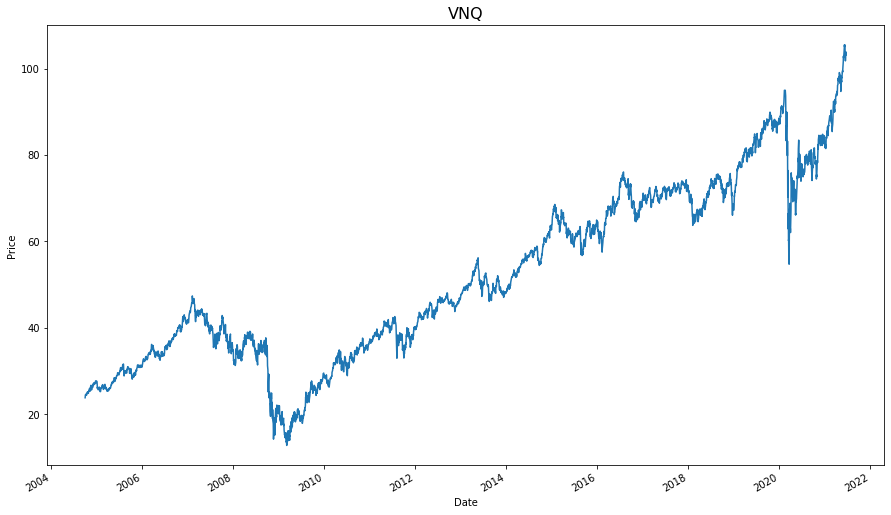

MAE: 0.7428
RMSE: 0.9558
R^2: 0.7745


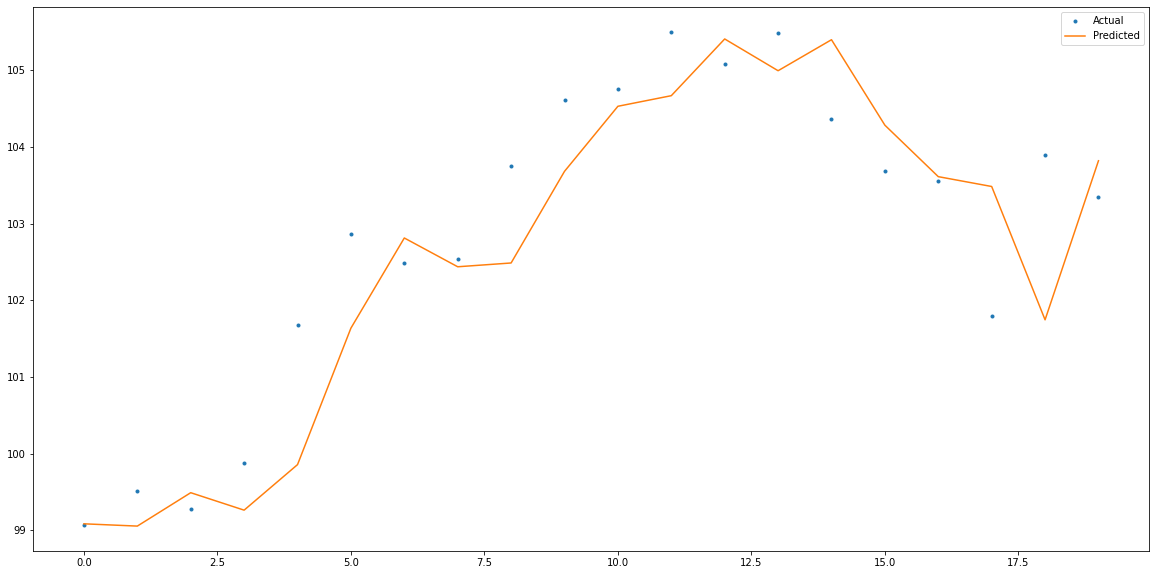

In [27]:
vnq_result = etf()

Select one REIT ETF from the following list: 

VNQ
IYR
SCHH
ICF
USRT
RWR
REM
REZ
KBWY
MORT
PSR
FRI
ROOF
RDOG
REK


Which REIT ETF do you want to predict? 
iyr
This dataframe's index is in datatime64? True


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2000-06-19,14.495063,14.495063,14.495063,14.495063,200,0.0,0.0,IYR
2000-06-20,14.533861,14.556489,14.533861,14.556489,400,0.0,0.0,IYR
2000-06-21,14.643762,14.643762,14.627599,14.627599,20600,0.0,0.0,IYR
2000-06-22,14.634065,14.634065,14.634065,14.634065,400,0.0,0.0,IYR
2000-06-23,14.634065,14.634065,14.634065,14.634065,0,0.0,0.0,IYR
...,...,...,...,...,...,...,...,...
2021-06-17,102.720001,103.190002,102.339996,103.040001,9029000,0.0,0.0,IYR
2021-06-18,102.760002,102.980003,101.379997,101.410004,7828200,0.0,0.0,IYR
2021-06-21,101.699997,103.730003,101.459999,103.470001,6758900,0.0,0.0,IYR


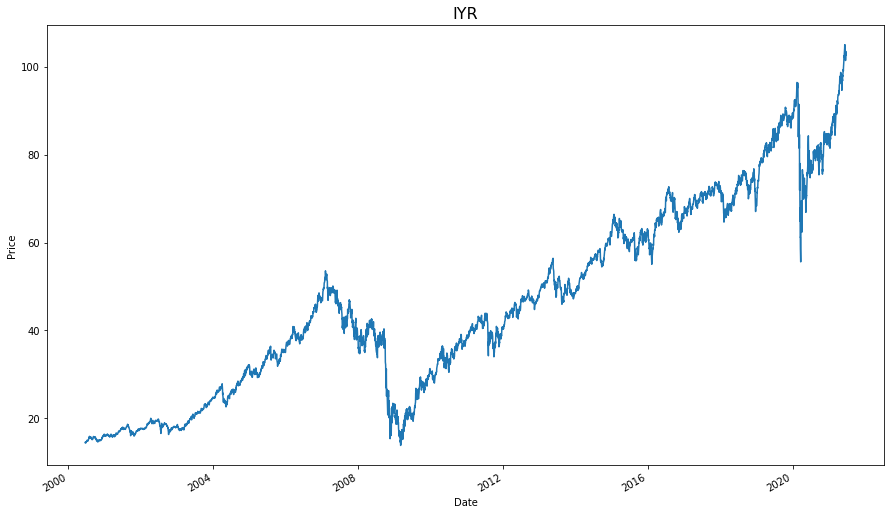

MAE: 0.7270
RMSE: 0.9093
R^2: 0.7625


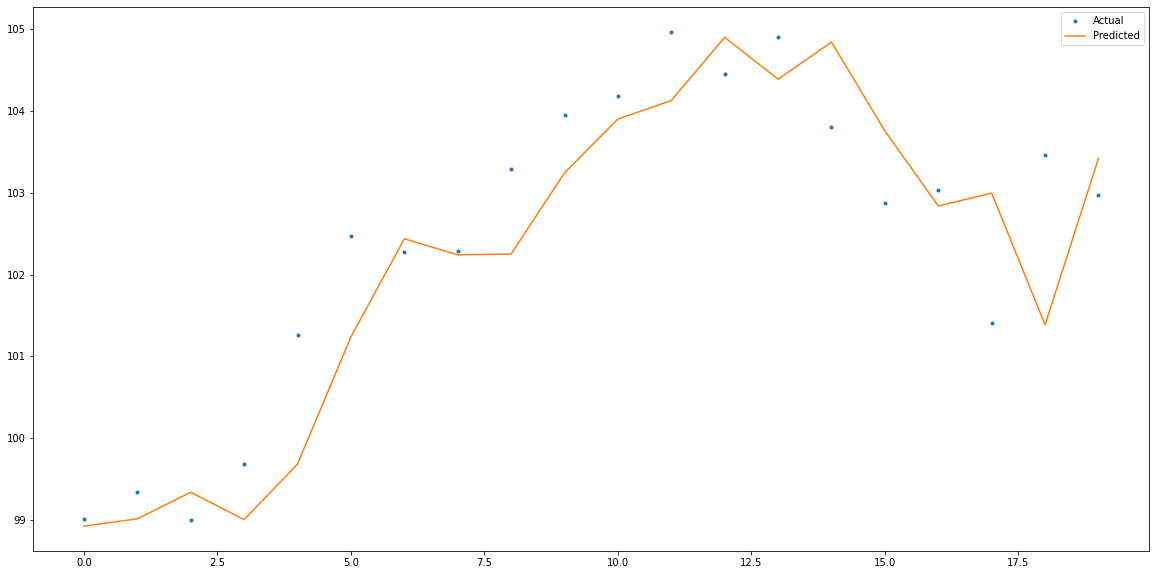

In [13]:
iyr_result = etf()

Select one REIT ETF from the following list: 

VNQ
IYR
SCHH
ICF
USRT
RWR
REM
REZ
KBWY
MORT
PSR
FRI
ROOF
RDOG
REK


Which REIT ETF do you want to predict? 
schh
This dataframe's index is in datatime64? True


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2011-01-13,19.156372,19.263051,19.125893,19.171612,13100,0.000,0.0,SCHH
2011-01-14,19.209716,19.346874,19.171617,19.346874,179800,0.000,0.0,SCHH
2011-01-18,19.369728,19.491646,19.278289,19.491646,60800,0.000,0.0,SCHH
2011-01-19,19.522134,19.522134,19.186859,19.240198,53900,0.000,0.0,SCHH
2011-01-20,19.240194,19.415451,19.209714,19.263054,21300,0.000,0.0,SCHH
...,...,...,...,...,...,...,...,...
2021-06-17,46.177091,46.326432,45.968006,46.266697,891700,0.000,0.0,SCHH
2021-06-18,46.017788,46.236823,45.480150,45.510017,1032500,0.000,0.0,SCHH
2021-06-21,45.719098,46.535514,45.519976,46.425995,609700,0.000,0.0,SCHH


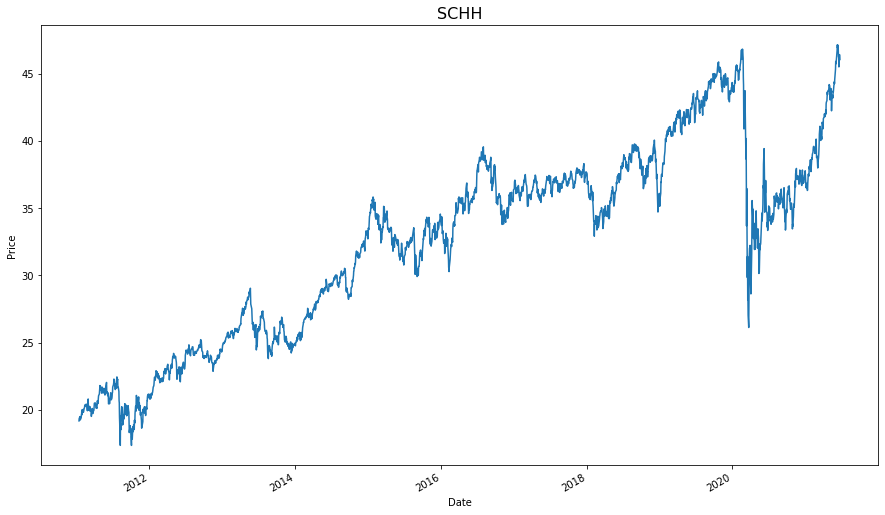

MAE: 0.3357
RMSE: 0.4200
R^2: 0.7898


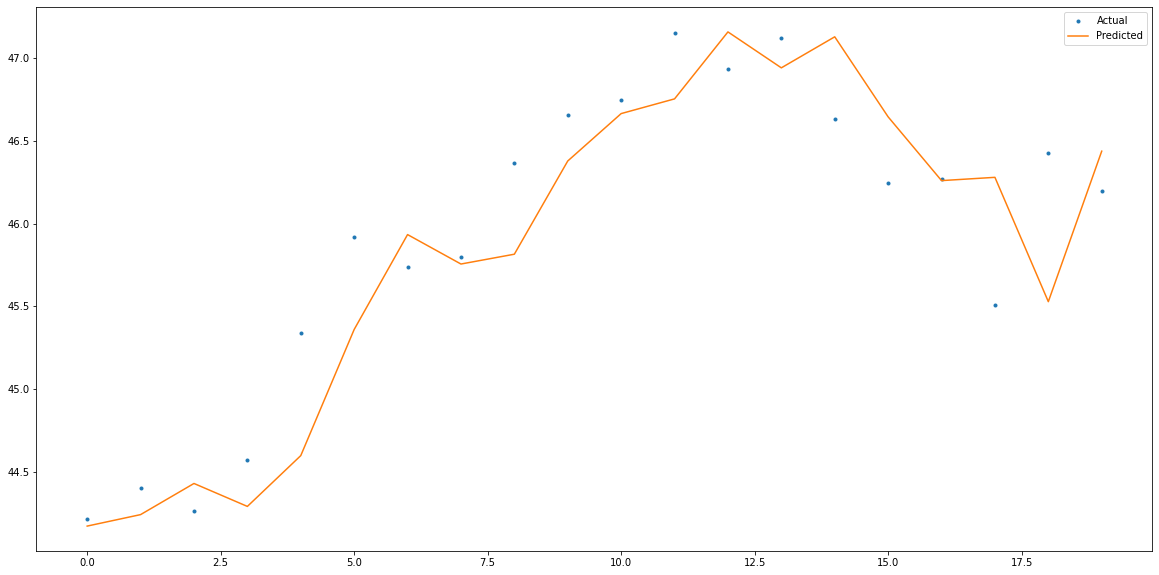

In [14]:
schh_result = etf()

Select one REIT ETF from the following list: 

VNQ
IYR
SCHH
ICF
USRT
RWR
REM
REZ
KBWY
MORT
PSR
FRI
ROOF
RDOG
REK


Which REIT ETF do you want to predict? 
icf
This dataframe's index is in datatime64? True


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2001-02-02,8.887099,8.887099,8.887099,8.887099,4800,0.0,0.0,ICF
2001-02-05,8.909679,8.909679,8.881886,8.881886,3200,0.0,0.0,ICF
2001-02-06,8.847145,8.847145,8.847145,8.847145,400,0.0,0.0,ICF
2001-02-07,8.810665,8.810665,8.810665,8.810665,800,0.0,0.0,ICF
2001-02-08,8.772449,8.772449,8.767238,8.767238,1600,0.0,0.0,ICF
...,...,...,...,...,...,...,...,...
2021-06-17,65.459999,66.050003,65.459999,65.980003,192600,0.0,0.0,ICF
2021-06-18,65.779999,66.010002,65.000000,65.000000,130800,0.0,0.0,ICF
2021-06-21,65.330002,66.419998,64.910004,66.239998,153100,0.0,0.0,ICF


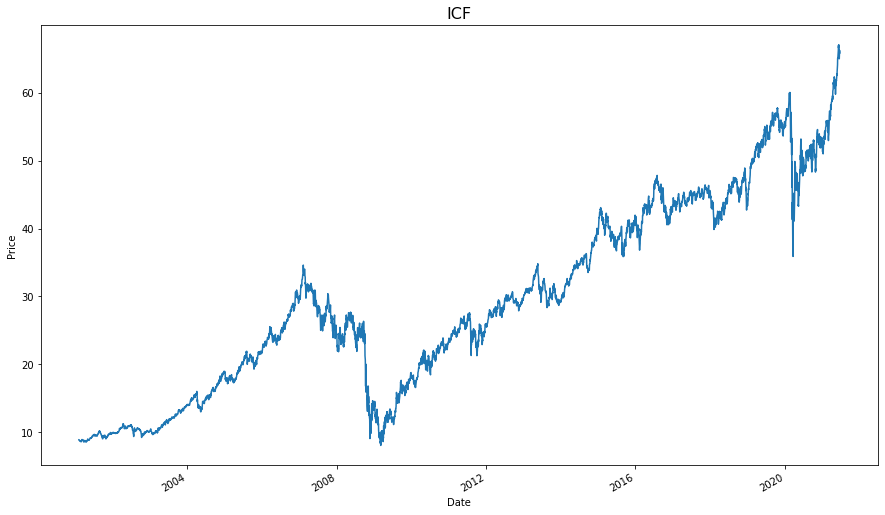

MAE: 0.4905
RMSE: 0.6060
R^2: 0.8156


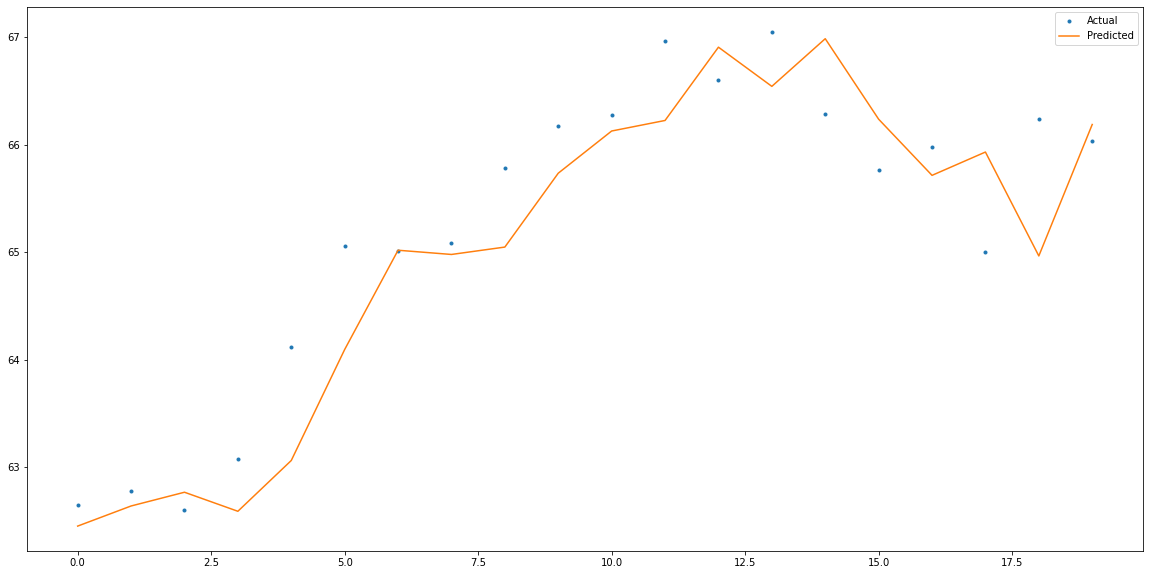

In [15]:
icf_result = etf()

Select one REIT ETF from the following list: 

VNQ
IYR
SCHH
ICF
USRT
RWR
REM
REZ
KBWY
MORT
PSR
FRI
ROOF
RDOG
REK


Which REIT ETF do you want to predict? 
usrt
This dataframe's index is in datatime64? True


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2007-05-04,27.844654,27.883691,27.682929,27.694082,4100,0.0,0.0,USRT
2007-05-07,27.744269,27.744269,27.721962,27.721962,3300,0.0,0.0,USRT
2007-05-08,27.643887,27.643887,27.537930,27.549084,5000,0.0,0.0,USRT
2007-05-09,27.878110,27.878110,27.777729,27.777729,4000,0.0,0.0,USRT
2007-05-10,27.744279,27.794470,27.482172,27.482172,10000,0.0,0.0,USRT
...,...,...,...,...,...,...,...,...
2021-06-17,59.240002,59.400002,58.730000,59.130001,186700,0.0,0.0,USRT
2021-06-18,58.900002,59.060001,58.070000,58.070000,199200,0.0,0.0,USRT
2021-06-21,58.250000,59.520000,58.119999,59.320000,187300,0.0,0.0,USRT


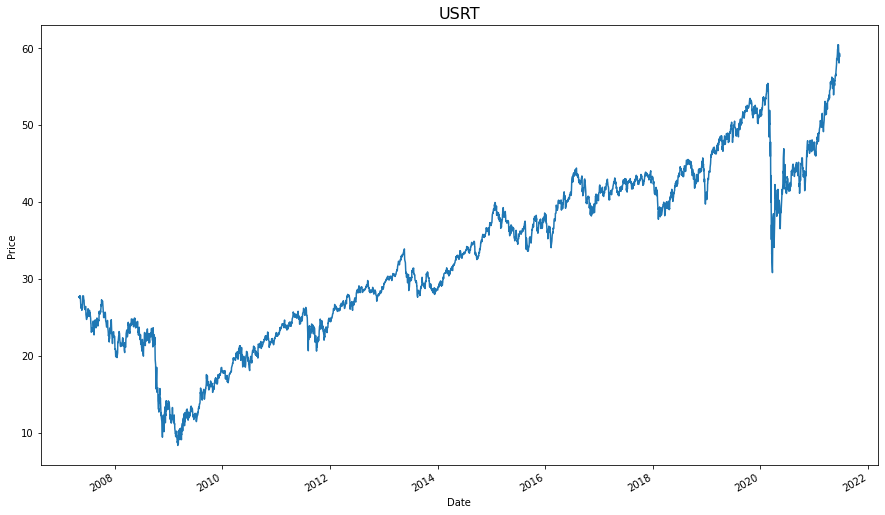

MAE: 0.4583
RMSE: 0.5822
R^2: 0.7924


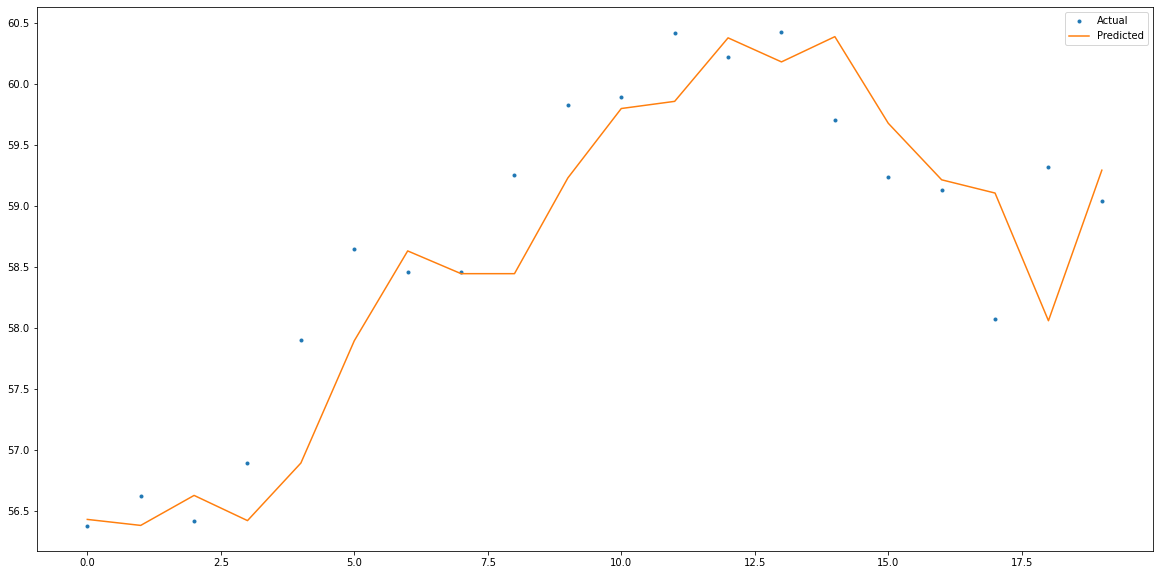

In [16]:
usrt_result = etf()

Select one REIT ETF from the following list: 

VNQ
IYR
SCHH
ICF
USRT
RWR
REM
REZ
KBWY
MORT
PSR
FRI
ROOF
RDOG
REK


Which REIT ETF do you want to predict? 
rwr
This dataframe's index is in datatime64? True


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2001-08-27,18.938980,18.938980,18.938980,18.938980,0,0.000,0.0,RWR
2001-08-28,18.938980,18.938980,18.938980,18.938980,0,0.000,0.0,RWR
2001-08-29,18.654512,18.654512,18.522763,18.575163,13800,0.000,0.0,RWR
2001-08-30,18.491325,18.491325,18.491325,18.491325,3000,0.000,0.0,RWR
2001-08-31,18.447905,18.447905,18.447905,18.447905,900,0.000,0.0,RWR
...,...,...,...,...,...,...,...,...
2021-06-17,106.289455,106.547731,105.584171,106.239784,90800,0.000,0.0,RWR
2021-06-18,105.762975,106.130513,104.253065,104.263000,785300,0.000,0.0,RWR
2021-06-21,104.769997,107.000000,104.510002,106.720001,180900,0.697,0.0,RWR


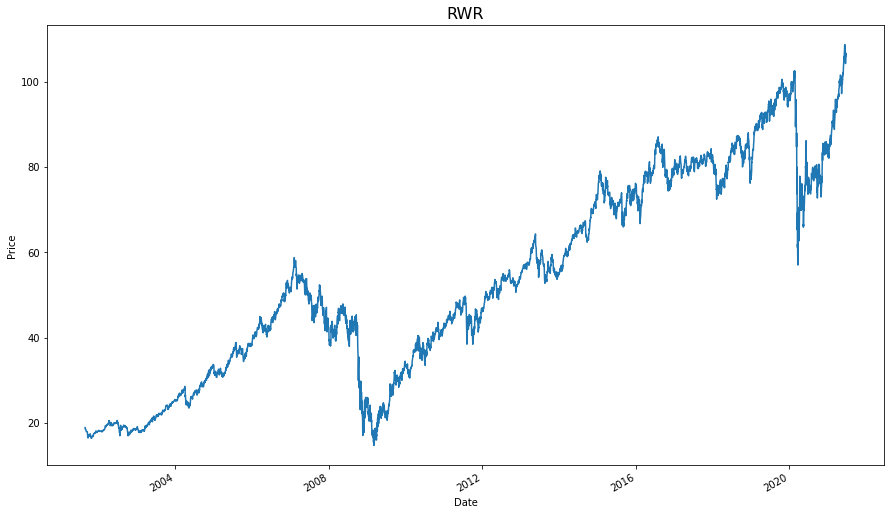

MAE: 0.8593
RMSE: 1.0842
R^2: 0.7514


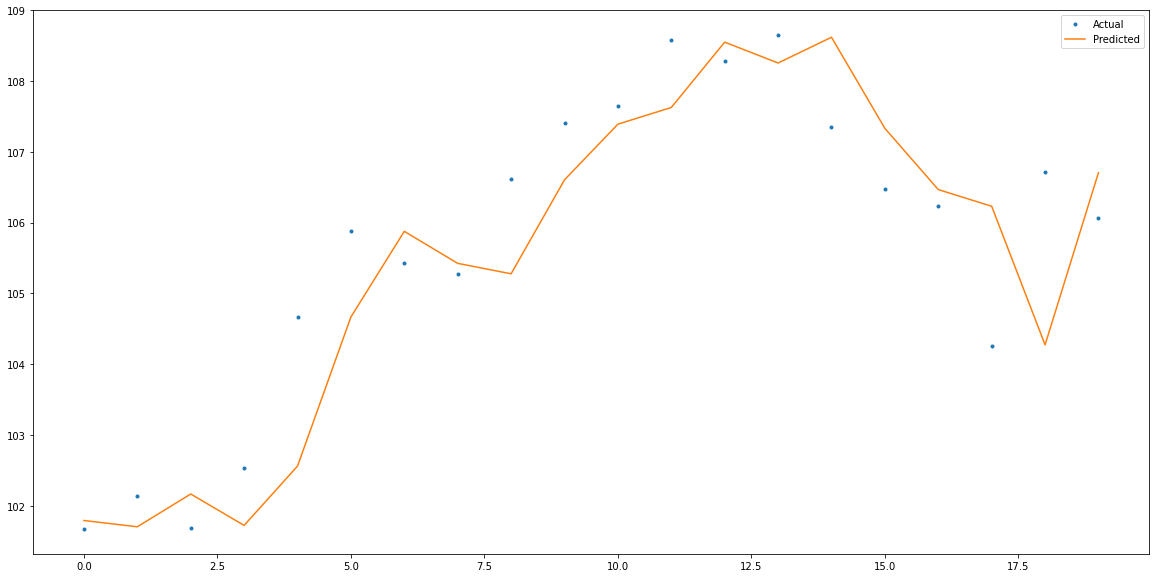

In [17]:
rwr_result = etf()

Select one REIT ETF from the following list: 

VNQ
IYR
SCHH
ICF
USRT
RWR
REM
REZ
KBWY
MORT
PSR
FRI
ROOF
RDOG
REK


Which REIT ETF do you want to predict? 
rem
This dataframe's index is in datatime64? True


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2007-05-04,42.258014,42.258014,42.123542,42.182373,1700,0.0,0.0,REM
2007-05-07,42.232778,42.375653,42.173946,42.173946,2800,0.0,0.0,REM
2007-05-08,41.921817,42.022671,41.703298,42.022671,1900,0.0,0.0,REM
2007-05-09,42.224397,42.325251,42.140350,42.274822,2700,0.0,0.0,REM
2007-05-10,42.300035,42.300035,41.753738,41.787357,5100,0.0,0.0,REM
...,...,...,...,...,...,...,...,...
2021-06-17,37.700001,37.849998,36.570000,36.990002,993100,0.0,0.0,REM
2021-06-18,36.730000,36.810001,36.090000,36.419998,811400,0.0,0.0,REM
2021-06-21,36.730000,37.279999,36.540001,37.240002,564800,0.0,0.0,REM


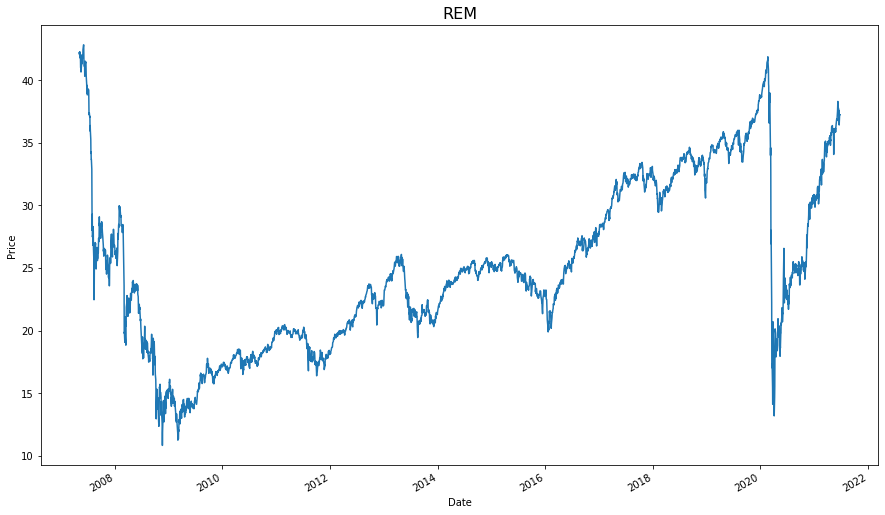

MAE: 0.3137
RMSE: 0.3766
R^2: 0.6832


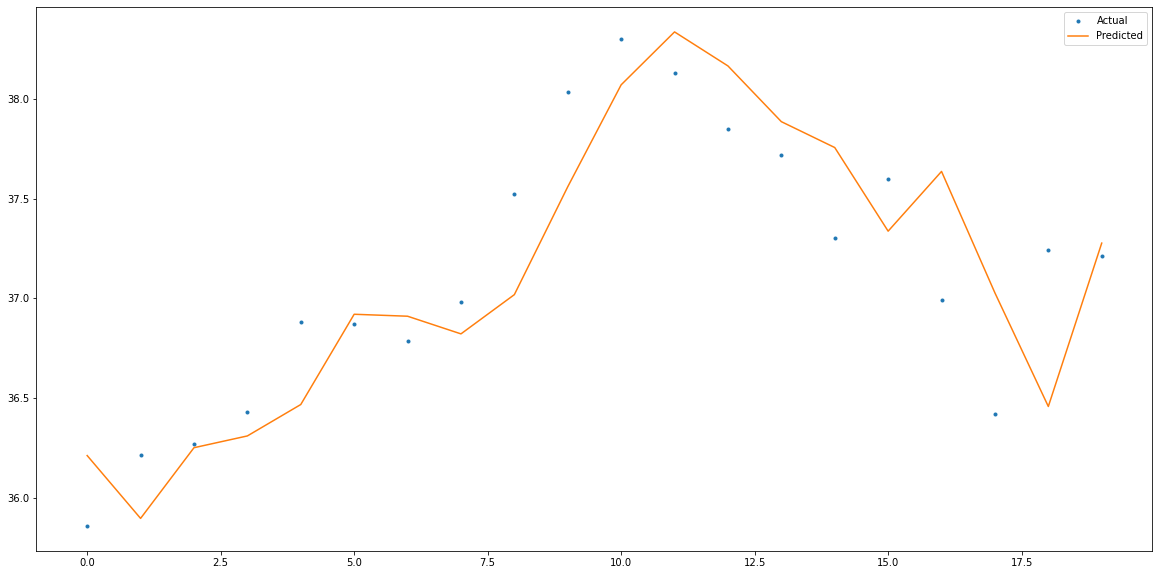

In [18]:
rem_result = etf()

Select one REIT ETF from the following list: 

VNQ
IYR
SCHH
ICF
USRT
RWR
REM
REZ
KBWY
MORT
PSR
FRI
ROOF
RDOG
REK


Which REIT ETF do you want to predict? 
rez
This dataframe's index is in datatime64? True


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2007-05-04,27.968724,27.968724,27.815081,27.815081,10000,0.0,0.0,REZ
2007-05-07,27.923201,27.923201,27.923201,27.923201,2000,0.0,0.0,REZ
2007-05-08,27.974421,27.974421,27.974421,27.974421,200,0.0,0.0,REZ
2007-05-09,27.934580,27.934580,27.934580,27.934580,2000,0.0,0.0,REZ
2007-05-10,28.281707,28.281707,28.105301,28.105301,8000,0.0,0.0,REZ
...,...,...,...,...,...,...,...,...
2021-06-17,83.379997,83.690002,82.959999,83.650002,67700,0.0,0.0,REZ
2021-06-18,83.169998,83.690002,82.190002,82.190002,44900,0.0,0.0,REZ
2021-06-21,82.629997,84.300003,82.379997,84.089996,41300,0.0,0.0,REZ


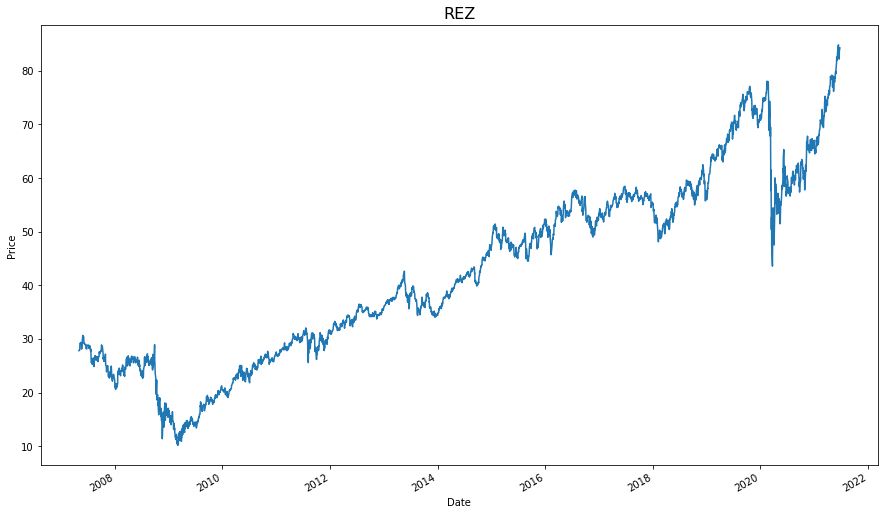

MAE: 0.6168
RMSE: 0.7959
R^2: 0.7717


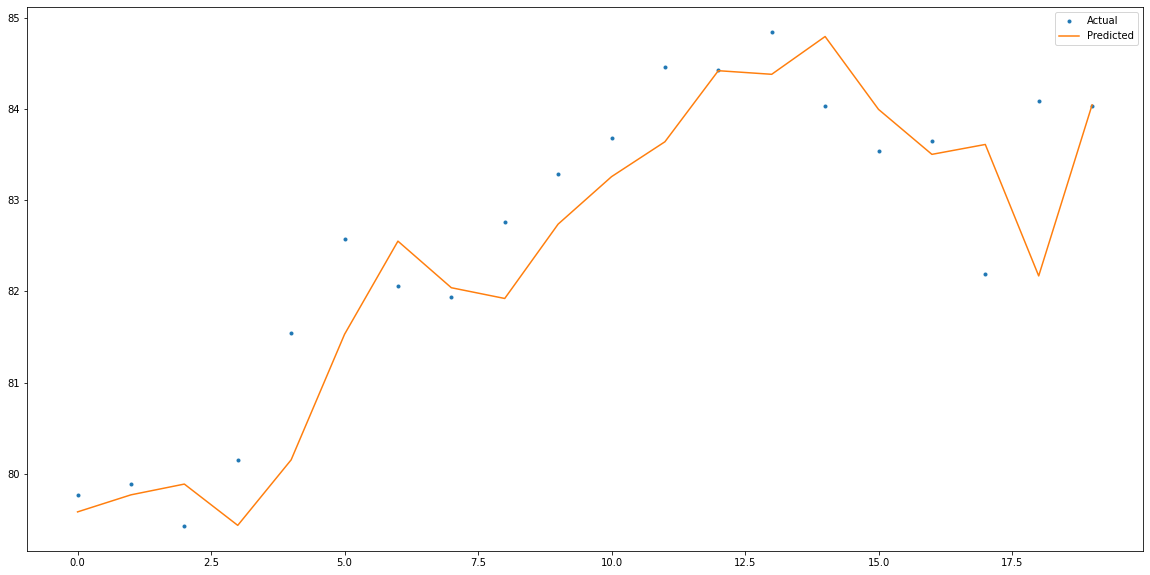

In [19]:
rez_result = etf()

Select one REIT ETF from the following list: 

VNQ
IYR
SCHH
ICF
USRT
RWR
REM
REZ
KBWY
MORT
PSR
FRI
ROOF
RDOG
REK


Which REIT ETF do you want to predict? 
kbwy
This dataframe's index is in datatime64? True


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2010-12-02,12.456609,12.587255,12.456609,12.587255,5400,0.000,0.0,KBWY
2010-12-03,12.692774,12.692774,12.537004,12.582228,6700,0.000,0.0,KBWY
2010-12-06,12.587255,12.587255,12.587255,12.587255,1600,0.000,0.0,KBWY
2010-12-07,12.642528,12.778199,12.642528,12.727950,8600,0.000,0.0,KBWY
2010-12-08,12.727948,12.727948,12.562128,12.562128,2000,0.000,0.0,KBWY
...,...,...,...,...,...,...,...,...
2021-06-17,23.612750,23.612750,23.174741,23.363880,250700,0.000,0.0,KBWY
2021-06-18,23.244424,23.294198,22.667047,22.677002,273900,0.000,0.0,KBWY
2021-06-21,22.799999,23.320000,22.740000,23.219999,191000,0.103,0.0,KBWY


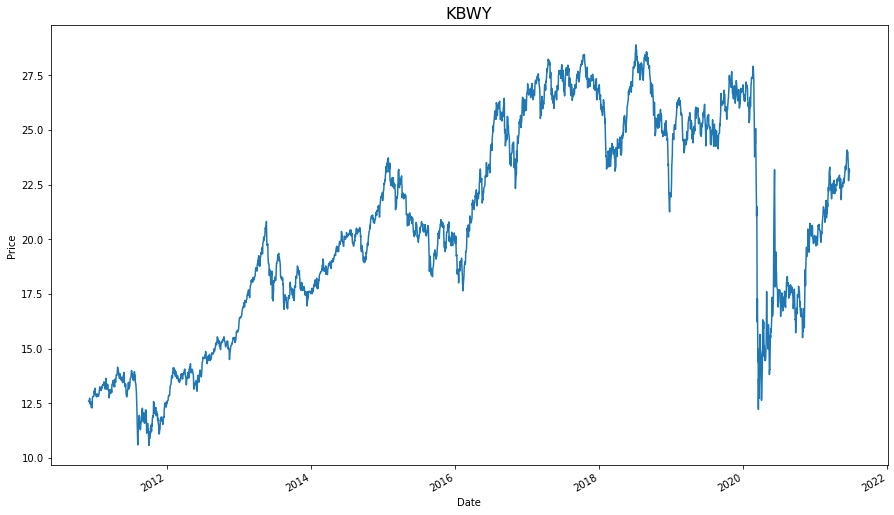

MAE: 0.2169
RMSE: 0.2720
R^2: 0.6668


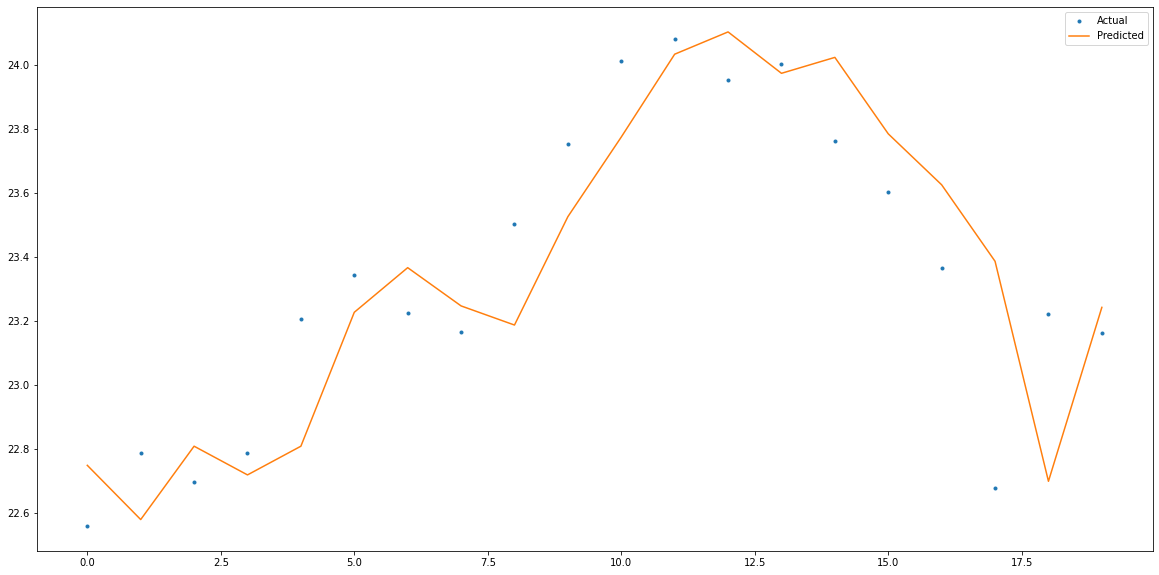

In [20]:
kbwy_result = etf()

Select one REIT ETF from the following list: 

VNQ
IYR
SCHH
ICF
USRT
RWR
REM
REZ
KBWY
MORT
PSR
FRI
ROOF
RDOG
REK


Which REIT ETF do you want to predict? 
mort
This dataframe's index is in datatime64? True


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2011-08-17,10.161433,10.771119,10.120787,10.149239,19800,0.0,0.0,MORT
2011-08-18,10.198013,10.198013,9.754975,9.803750,54000,0.0,0.0,MORT
2011-08-19,9.746848,9.852527,9.633040,9.633040,41800,0.0,0.0,MORT
2011-08-22,9.754975,9.791556,9.551746,9.673683,18000,0.0,0.0,MORT
2011-08-23,10.157372,10.157372,9.677752,9.876916,21200,0.0,0.0,MORT
...,...,...,...,...,...,...,...,...
2021-06-17,20.240000,20.299999,19.629999,19.889999,296900,0.0,0.0,MORT
2021-06-18,19.730000,19.740000,19.360001,19.530001,190300,0.0,0.0,MORT
2021-06-21,19.690001,19.990000,19.590000,19.969999,131100,0.0,0.0,MORT


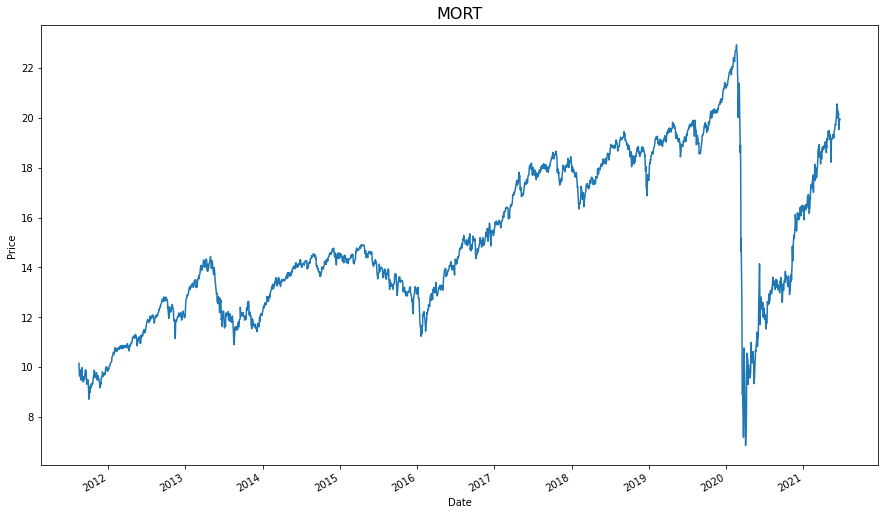

MAE: 0.1713
RMSE: 0.2102
R^2: 0.6837


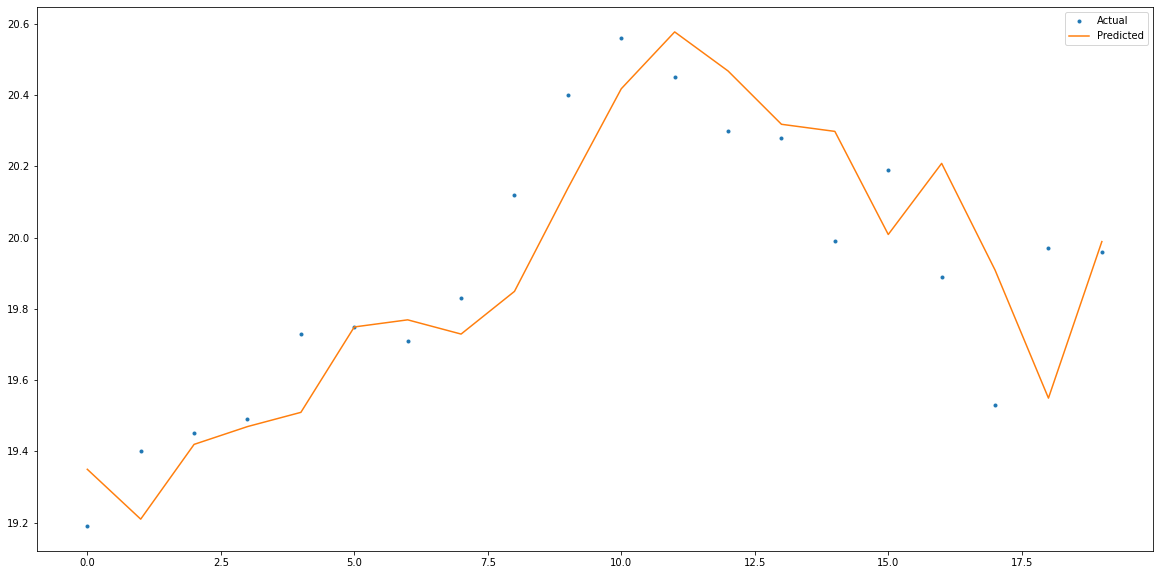

In [21]:
mort_result = etf()

Select one REIT ETF from the following list: 

VNQ
IYR
SCHH
ICF
USRT
RWR
REM
REZ
KBWY
MORT
PSR
FRI
ROOF
RDOG
REK


Which REIT ETF do you want to predict? 
psr
This dataframe's index is in datatime64? True


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2008-11-21,14.898399,15.373638,14.898399,15.373638,200,0.000,0.0,PSR
2008-11-24,15.373638,15.373638,15.373638,15.373638,0,0.000,0.0,PSR
2008-11-25,15.373638,15.373638,15.373638,15.373638,0,0.000,0.0,PSR
2008-11-26,15.373638,15.373638,15.373638,15.373638,0,0.000,0.0,PSR
2008-11-28,15.373638,15.373638,15.373638,15.373638,0,0.000,0.0,PSR
...,...,...,...,...,...,...,...,...
2021-06-17,104.146797,104.415016,103.799113,104.415016,3400,0.000,0.0,PSR
2021-06-18,103.650106,103.918325,102.915001,102.915001,4700,0.000,0.0,PSR
2021-06-21,103.129997,104.930000,103.129997,104.629997,5700,0.685,0.0,PSR


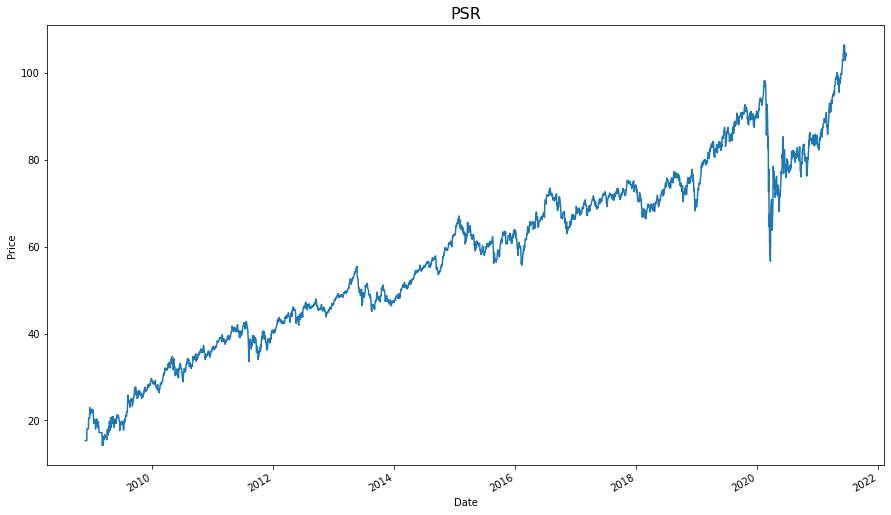

MAE: 0.7456
RMSE: 0.9241
R^2: 0.8200


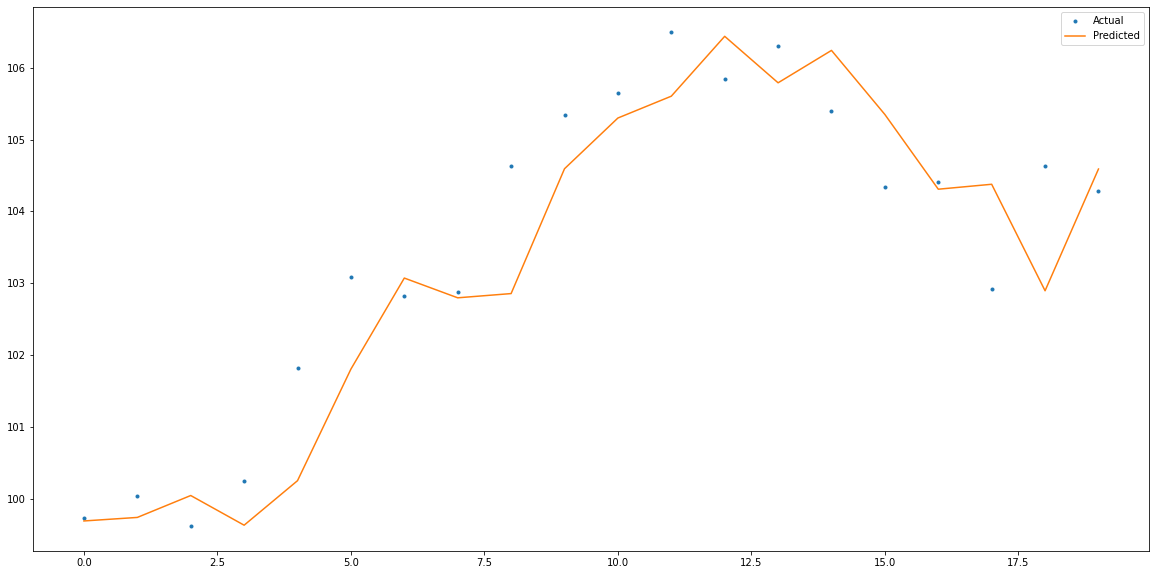

In [22]:
psr_result = etf()

Select one REIT ETF from the following list: 

VNQ
IYR
SCHH
ICF
USRT
RWR
REM
REZ
KBWY
MORT
PSR
FRI
ROOF
RDOG
REK


Which REIT ETF do you want to predict? 
fri
This dataframe's index is in datatime64? True


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2007-05-10,13.840371,13.840371,13.792315,13.792315,3100,0.0,0.0,FRI
2007-05-11,13.874696,13.874696,13.806044,13.826639,10000,0.0,0.0,FRI
2007-05-14,13.888428,13.902159,13.792315,13.792315,13000,0.0,0.0,FRI
2007-05-15,13.806046,13.806046,13.620684,13.620684,7000,0.0,0.0,FRI
2007-05-16,13.606949,13.606949,13.421586,13.449048,12600,0.0,0.0,FRI
...,...,...,...,...,...,...,...,...
2021-06-17,28.500000,28.530001,28.360001,28.510000,16100,0.0,0.0,FRI
2021-06-18,28.360001,28.389999,28.000000,28.020000,38000,0.0,0.0,FRI
2021-06-21,28.090000,28.680000,28.090000,28.610001,16200,0.0,0.0,FRI


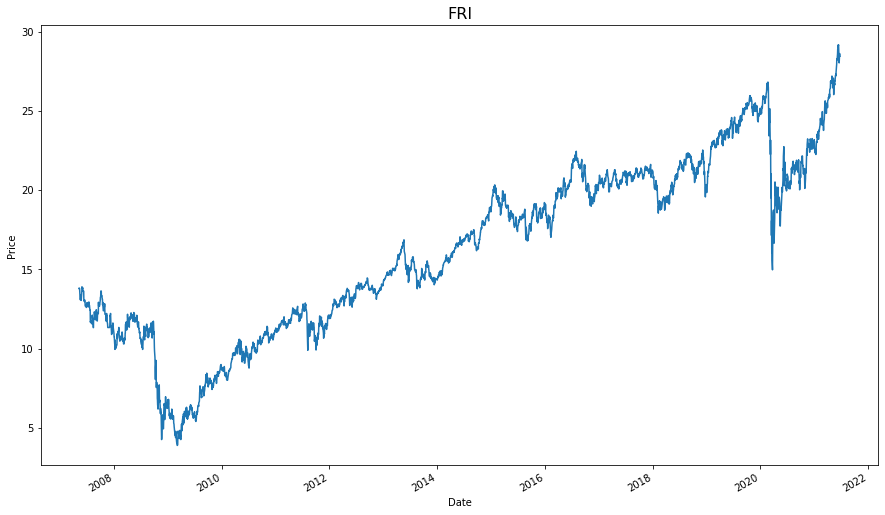

MAE: 0.2157
RMSE: 0.2750
R^2: 0.8014


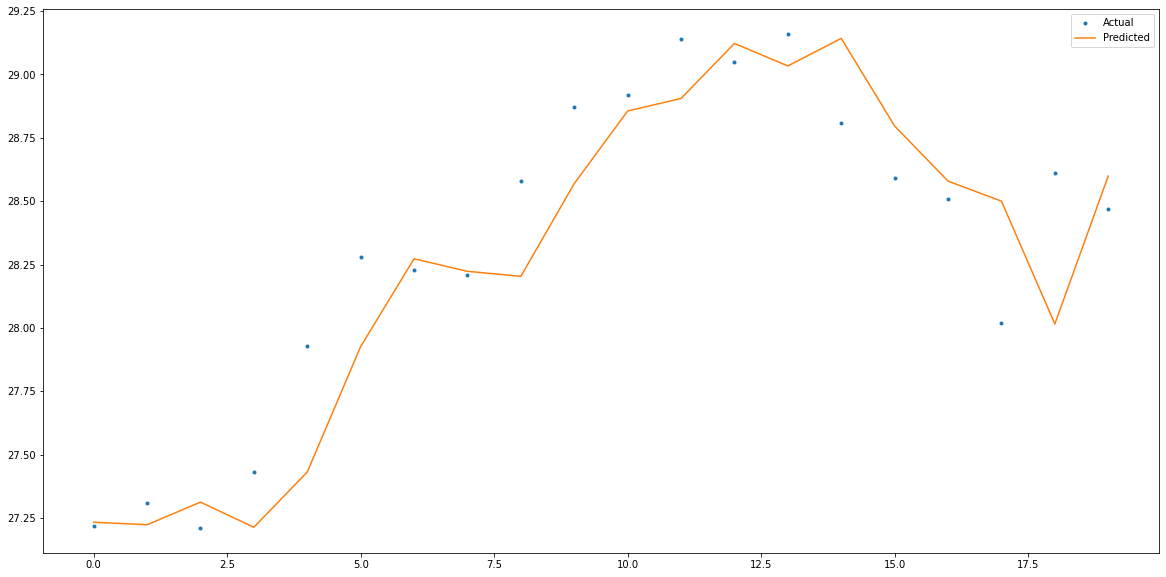

In [23]:
fri_result = etf()

Select one REIT ETF from the following list: 

VNQ
IYR
SCHH
ICF
USRT
RWR
REM
REZ
KBWY
MORT
PSR
FRI
ROOF
RDOG
REK


Which REIT ETF do you want to predict? 
roof
This dataframe's index is in datatime64? True


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2011-06-14,11.607101,11.681873,11.595597,11.658867,46100,0.000,0.0,ROOF
2011-06-15,11.578343,11.578343,11.388535,11.405790,25700,0.000,0.0,ROOF
2011-06-16,11.607097,11.641607,11.474806,11.566834,32400,0.000,0.0,ROOF
2011-06-17,11.676122,11.762399,11.653115,11.658867,19600,0.000,0.0,ROOF
2011-06-20,11.710632,11.796908,11.710632,11.762398,13400,0.000,0.0,ROOF
...,...,...,...,...,...,...,...,...
2021-06-17,26.663799,26.683624,26.217752,26.396170,13200,0.000,0.0,ROOF
2021-06-18,26.197927,26.197927,25.851000,25.851000,3600,0.000,0.0,ROOF
2021-06-21,26.020000,26.540001,26.020000,26.459999,3600,0.229,0.0,ROOF


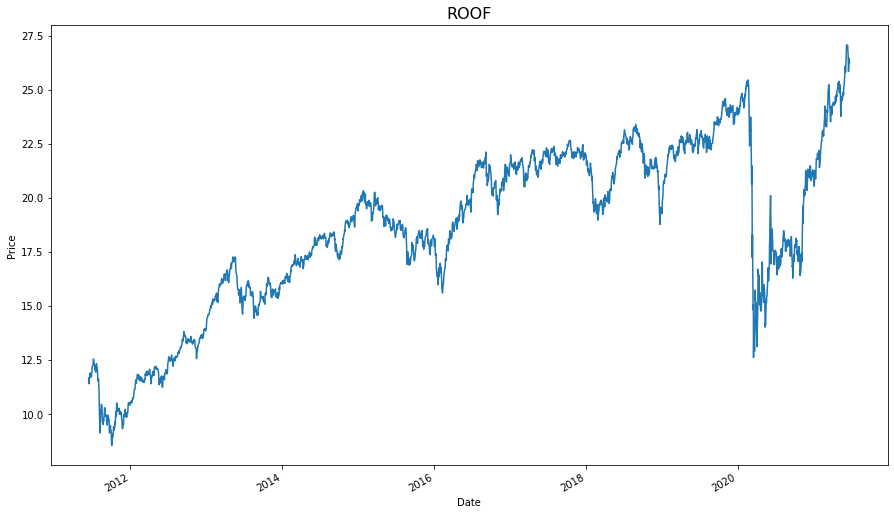

MAE: 0.2586
RMSE: 0.3325
R^2: 0.7792


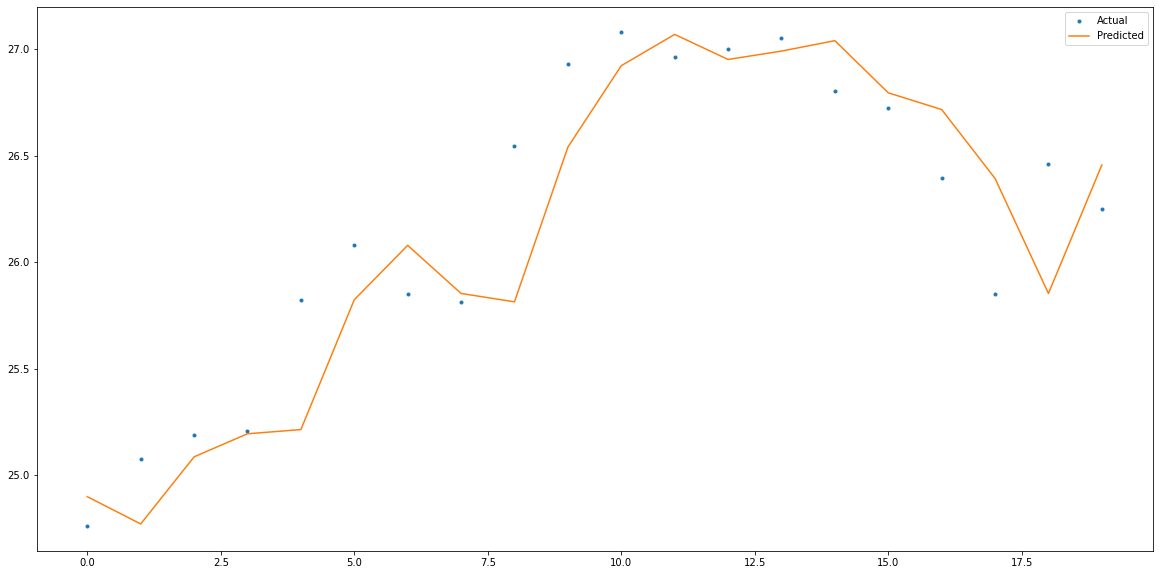

In [24]:
roof_result = etf()

Select one REIT ETF from the following list: 

VNQ
IYR
SCHH
ICF
USRT
RWR
REM
REZ
KBWY
MORT
PSR
FRI
ROOF
RDOG
REK


Which REIT ETF do you want to predict? 
rdog
This dataframe's index is in datatime64? True


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2008-05-22,28.424102,28.430024,28.382639,28.400410,2300,0.000,0.0,RDOG
2008-05-23,28.424111,28.424111,28.341188,28.341188,1300,0.000,0.0,RDOG
2008-05-27,28.193108,28.193108,28.193108,28.193108,5100,0.000,0.0,RDOG
2008-05-28,28.400418,28.400418,28.329344,28.370804,6000,0.000,0.0,RDOG
2008-05-29,28.240491,28.400410,28.240491,28.400410,3000,0.000,0.0,RDOG
...,...,...,...,...,...,...,...,...
2021-06-17,48.520000,48.520000,48.160000,48.419998,1000,0.473,0.0,RDOG
2021-06-18,47.889999,47.889999,47.459999,47.459999,1000,0.000,0.0,RDOG
2021-06-21,47.560001,48.400002,47.560001,48.400002,800,0.000,0.0,RDOG


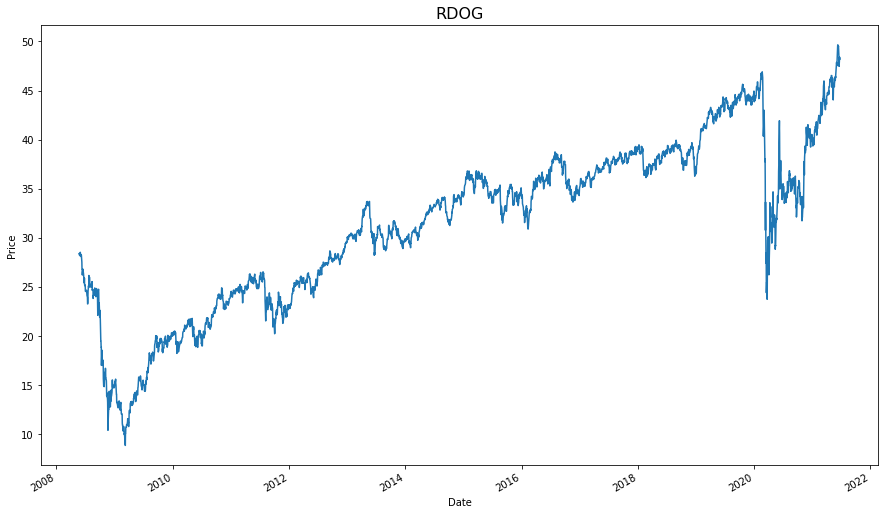

MAE: 0.4257
RMSE: 0.5294
R^2: 0.7784


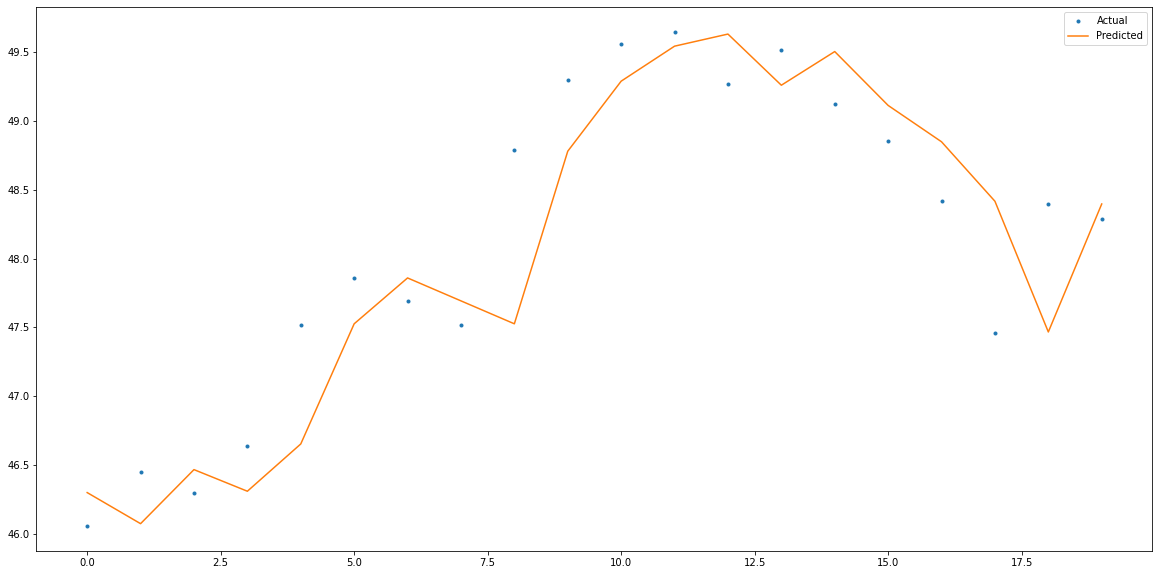

In [25]:
rdog_result = etf()

Select one REIT ETF from the following list: 

VNQ
IYR
SCHH
ICF
USRT
RWR
REM
REZ
KBWY
MORT
PSR
FRI
ROOF
RDOG
REK


Which REIT ETF do you want to predict? 
rek
This dataframe's index is in datatime64? True


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
Date,,,,,,,,
2010-03-18,48.618335,48.618335,48.264321,48.510166,1000,0.0,0.0,REK
2010-03-19,48.460994,49.178862,48.460994,49.031357,62700,0.0,0.0,REK
2010-03-22,49.523048,49.523048,48.470831,48.638004,36800,0.0,0.0,REK
2010-03-23,48.519999,48.883849,48.519999,48.756012,1500,0.0,0.0,REK
2010-03-24,48.756012,48.756012,48.756012,48.756012,0,0.0,0.0,REK
...,...,...,...,...,...,...,...,...
2021-06-17,9.280000,9.290000,9.220000,9.220000,5200,0.0,0.0,REK
2021-06-18,9.330000,9.370000,9.270000,9.370000,22800,0.0,0.0,REK
2021-06-21,9.320000,9.320000,9.170000,9.170000,22900,0.0,0.0,REK


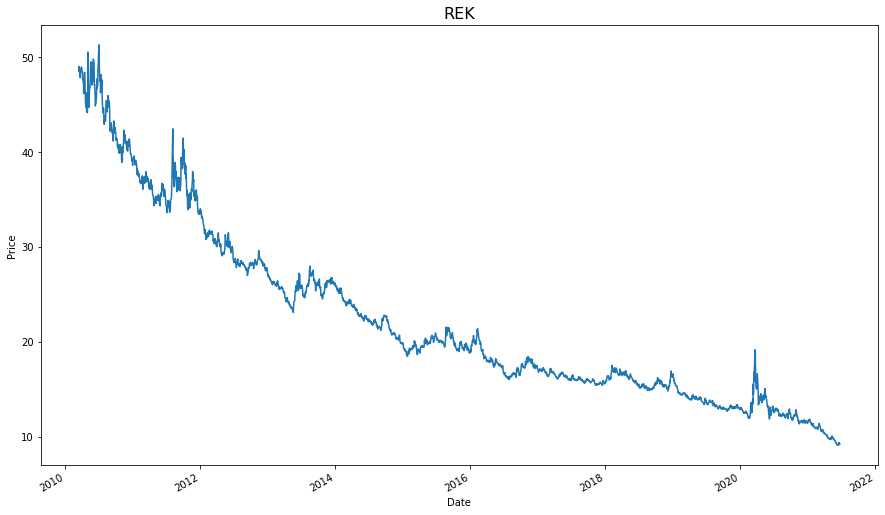

MAE: 0.0667
RMSE: 0.0840
R^2: 0.7750


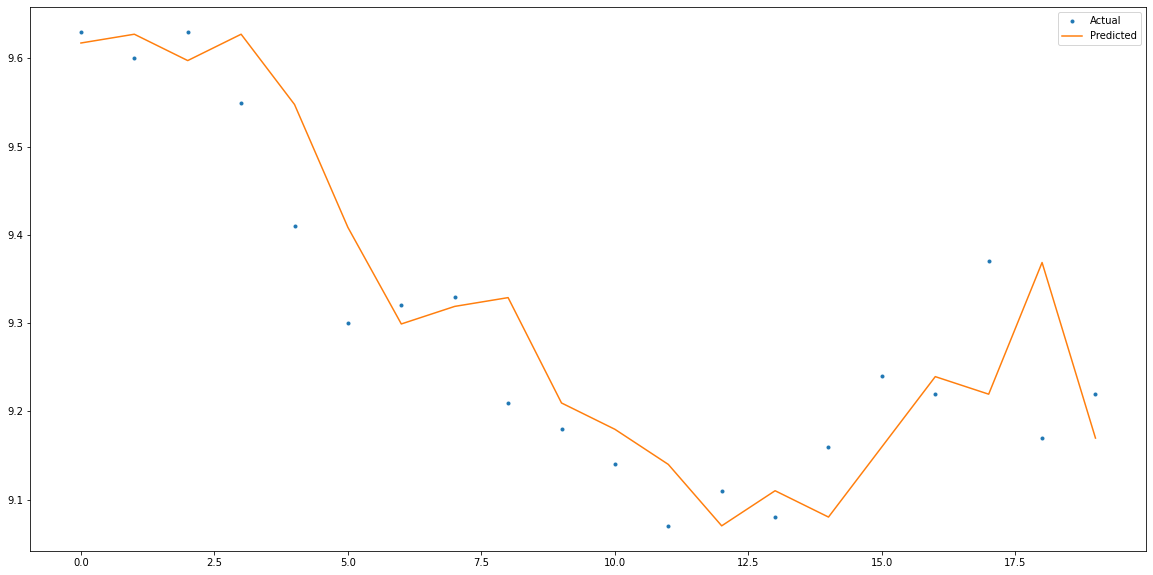

In [26]:
rek_result = etf()